In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X,y = make_blobs(n_samples = 300, centers = 4, random_state = 0, cluster_std = 0.60)

In [2]:
X[:10]

array([[ 0.83685684,  2.13635938],
       [-1.4136581 ,  7.40962324],
       [ 1.15521298,  5.09961887],
       [-1.01861632,  7.81491465],
       [ 1.27135141,  1.89254207],
       [ 3.43761754,  0.26165417],
       [-1.80822253,  1.59701749],
       [ 1.41372442,  4.38117707],
       [-0.20493217,  8.43209665],
       [-0.71109961,  8.66043846]])

In [3]:
y[:10]

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3])

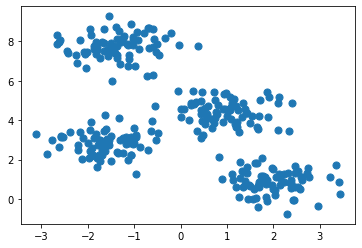

In [4]:
plt.scatter(X[:,0], X[:, 1], s=50);

In [5]:
from sklearn.cluster import KMeans

In [6]:
est = KMeans(4)
est.fit(X)
y_est = est.predict(X)

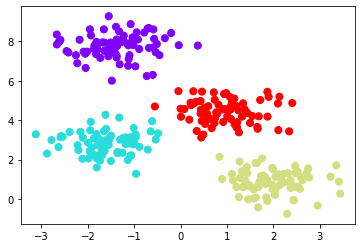

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y_est, s=50, cmap = 'rainbow')

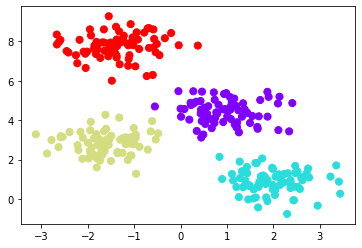

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap = 'rainbow')

-> Clustering works on Expectation Maximization
1. Guess some cluster centers
2. Repeat untill unverged
    - Assign points to the nearest cluster
    - Set the cluster centers to the mean

In [9]:
# Load_digits

In [10]:
from sklearn.datasets import load_digits

In [11]:
digits = load_digits()

In [13]:
digits.data.shape

(1797, 64)

In [15]:
digits.target.shape

(1797,)

In [16]:
digits.target[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
digits.data[0].reshape((8,8))

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

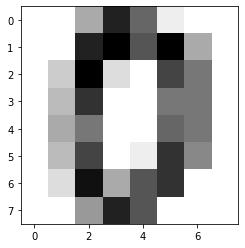

In [18]:
plt.imshow(digits.data[0].reshape((8,8)), cmap=plt.cm.binary);

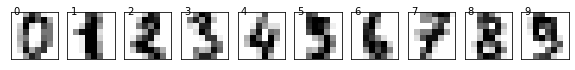

In [23]:
fig = plt.figure(figsize=(10,3))
for i in range(10):
    ax = fig.add_subplot(1, 10, i+1, xticks=[], yticks=[])
    ax.imshow(digits.data[i].reshape((8,8)), cmap=plt.cm.binary)
    ax.text(0,0, digits.target[i])

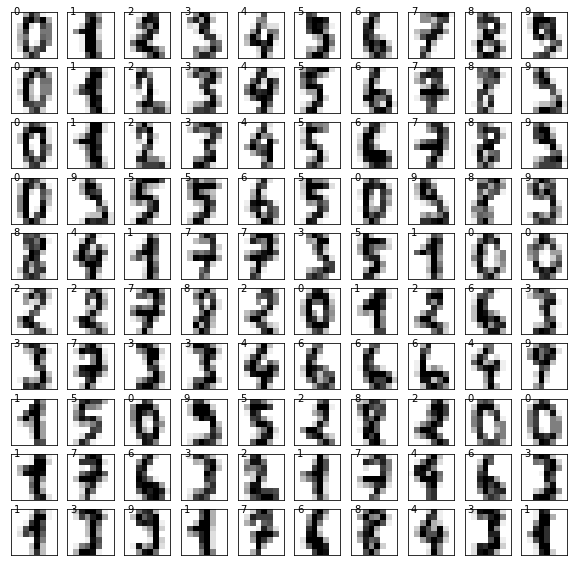

In [27]:
fig = plt.figure(figsize=(10,10))
for i in range(10):
    for j in range(10):
        ax = fig.add_subplot(10,10, 10*i+j+1, xticks=[], yticks=[])
        ax.imshow(digits.data[10*i+j].reshape((8,8)), cmap=plt.cm.binary)
        ax.text(0,0, digits.target[10*i+j])

In [37]:
est = KMeans(n_clusters = 10)
clusters = est.fit_predict(digits.data)

In [38]:
clusters[:10]

array([6, 3, 3, 7, 8, 2, 4, 9, 2, 2])

In [39]:
digits.target[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
est.cluster_centers_.shape

(10, 64)

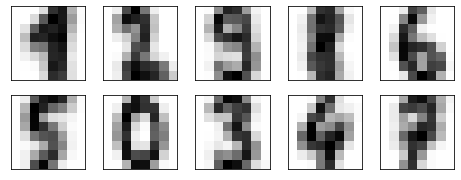

In [41]:
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2,5,1+i, xticks=[],yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8,8)), cmap = plt.cm.binary)

In [43]:
import numpy as np

In [44]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

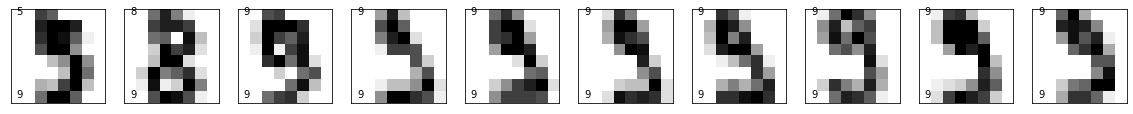

In [52]:
fig = plt.figure(figsize=(20,3))
for i in range(10):
        ax = fig.add_subplot(1,10,i+1, xticks=[], yticks=[])
        ax.imshow(digits.data[clusters==2][i].reshape((8,8)), cmap=plt.cm.binary)
        ax.text(0,0, digits.target[clusters==2][i])
        ax.text(0,7,labels[clusters==2][i])

In [53]:
# visualising clusters
# PCA to reduce dimensions

from sklearn.decomposition import PCA
X = PCA(2).fit_transform(digits.data)

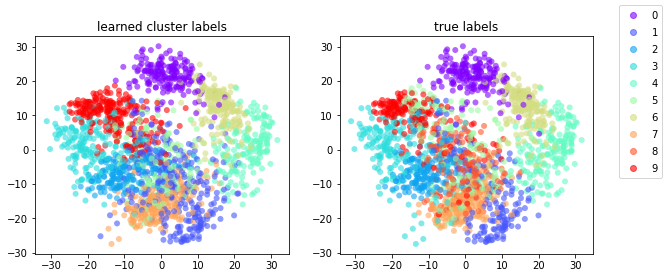

In [54]:
kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10), edgecolor='none', alpha=0.6)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax1.set_title('learned cluster labels')

sc = ax2.scatter(X[:, 0], X[:, 1], c=digits.target, **kwargs)
ax2.set_title('true labels')
fig.legend(*sc.legend_elements(), loc='upper right');

In [55]:
from sklearn.metrics  import accuracy_score
accuracy_score(digits.target, labels)

0.7896494156928213

In [58]:
from sklearn.metrics import confusion_matrix
cf_mat = confusion_matrix(digits.target, labels)

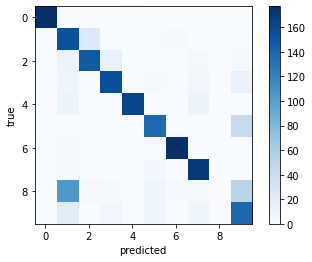

In [59]:
plt.imshow(cf_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');